In [ ]:
!python3 --version

: 

In [2]:
import os
import re
import pandas as pd

from pathlib import Path

In [3]:
# Dataset Paths

DATASET_PATH = Path('/mnt/DATA/fharookshaik/Major Project/dataset')
IMAGES_DIR_PATH = os.path.join(DATASET_PATH,'images')

TRAIN_CSV_PATH = os.path.join(DATASET_PATH,'train.csv')
VALIDATE_CSV_PATH = os.path.join(DATASET_PATH,'val.csv')

In [4]:
test_df = pd.read_json('/mnt/DATA/fharookshaik/Major Project/dataset/train.json')
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,5542,5543,5544,5545,5546,5547,5548,5549,5550,5551
OCR,Bernie or Elizabeth?\nBe informed.Compare them...,Extending the\nBrexit deadline until\nOctober ...,kwai\ngkwa 0964\n#nnevvy\napplause to Thais fr...,"So, I order this\nfoce mask to\nprotect ogains...",best candidate for\nJA\n2020\njoe biden\nKamal...,BREAKING NEWS!\nEL\nCH\nAND MANNEQUINS THEN HE...,MASK\nTRUMP\nTRUMP\nDEN CE\nHelp your child fi...,#Hantavirus\nChina discovered new virus\nWhole...,When it's finally 2020 but you realize\nthat b...,nese NewYear\nChira's attermpt\nat controlling...,...,PARTY THAT DEFEATED SLAVERY\nBUT NOW DEFENDS C...,i PONT NEED HEALTH\nINSURANCE\nI HAVE JESUS\n,WHEN YOUR BFF MAKES PLANS WITHOUT YOU\n50\n@B ...,J.B. PRITZER'S NET\nWORTH: $3.5 BILLION\nTHERE...,BLM\ncovid 19 protesting\nTrump\nrally\ncovid ...,Trump could shoot someone\non the Senate floor...,MANY PEOPLE ASK\nME WHY ALL MY SCHOOL\nRECORDS...,my bes\nfriend\nmy\nmother\nconsclence\nmy the...,THE\nN-WORD\nPASS\nSigned and\napproved by\nBe...,Biden-Obama\nMemes\n300. Funny & Hillarious\nM...
image,covid_memes_18.png,covid_memes_19.png,covid_memes_252.png,covid_memes_255.png,covid_memes_20.png,covid_memes_56.png,covid_memes_60.png,covid_memes_259.png,covid_memes_263.png,covid_memes_268.png,...,memes_4832.png,memes_5020.png,memes_1066.png,memes_3413.png,memes_6811.png,memes_5039.png,memes_2635.png,memes_1384.png,memes_944.png,memes_982.png
hero,[],[],[thais],[],[joe biden],[],[donald trump],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
villain,[],[uk government],[],[china],[],[donald trump],[barack obama],[china],[],[wuhan coronavirus],...,[republican party],[],[],[j.b. pritzer],[],[donald trump],[],[],[],[]
victim,[],[],[],[],[],[],[],"[people, world]",[],[china],...,[democratic party],[],[],[],[black lives matter (blm) protest],[],[],[],[],[]


In [5]:
train_df = pd.read_csv(TRAIN_CSV_PATH)
train_df

,OCR,image,hero,villain,victim,other
0,Bernie or Elizabeth? Be informed.Compare them ...,covid_memes_18.png,NaN,NaN,NaN,"['bernie sanders', 'elizabeth warren']"
1,Extending the Brexit deadline until October 31...,covid_memes_19.png,NaN,['uk government'],NaN,NaN
2,kwai gkwa 0964 #nnevvy applause to Thais from ...,covid_memes_252.png,['thais'],NaN,NaN,['hong kong']
3,"So, I order this foce mask to protect ogainst ...",covid_memes_255.png,NaN,['china'],NaN,"['face mask', 'made in china', 'coronavirus']"
4,best candidate for JA 2020 joe biden Kamala ha...,covid_memes_20.png,['joe biden'],NaN,NaN,"['bernie sanders', 'kamala harris', 'tiktok']"
...,...,...,...,...,...,...
5547,Trump could shoot someone on the Senate floor ...,memes_5039.png,NaN,['donald trump'],NaN,"['senate floor', 'republican']"
5548,MANY PEOPLE ASK ME WHY ALL MY SCHOOL RECORDS A...,memes_2635.png,NaN,NaN,NaN,"['school', 'university', 'joe biden']"
5549,my bes friend my mother consclence my therapis...,memes_1384.png,NaN,NaN,NaN,"['msnbc', 'bernie sanders', 'democratic party'..."
5550,THE N-WORD PASS Signed and approved by Beak Ob...,memes_944.png,NaN,NaN,NaN,['barack obama']


In [6]:
train_df = train_df.fillna(value=0)
train_df.head()

,OCR,image,hero,villain,victim,other
0,Bernie or Elizabeth? Be informed.Compare them ...,covid_memes_18.png,0,0,0,"['bernie sanders', 'elizabeth warren']"
1,Extending the Brexit deadline until October 31...,covid_memes_19.png,0,['uk government'],0,0
2,kwai gkwa 0964 #nnevvy applause to Thais from ...,covid_memes_252.png,['thais'],0,0,['hong kong']
3,"So, I order this foce mask to protect ogainst ...",covid_memes_255.png,0,['china'],0,"['face mask', 'made in china', 'coronavirus']"
4,best candidate for JA 2020 joe biden Kamala ha...,covid_memes_20.png,['joe biden'],0,0,"['bernie sanders', 'kamala harris', 'tiktok']"


In [25]:
class AffrmScore:
    def __init__(self,val):
        self.val = val

        # Parsing Val
        self.OCR = str(val.get('OCR')).lower()
        self.hero = val.get('hero')
        self.villain = val.get('villain')
        self.victim = val.get('victim')
        self.other = val.get('other')

        
        # Metrics
        self.metrics = {
            "hero" : self._cal_affirm_score(self.hero),
            "villain" : self._cal_affirm_score(self.villain),
            "victim" : self._cal_affirm_score(self.victim),
            "other" : self._cal_affirm_score(self.other),
        }
        self.total = (self.metrics.get("hero") + self.metrics.get("villain") + self.metrics.get("victim") + self.metrics.get("other")) / 4
        
    
    def _cal_affirm_score(self,key):
        temp_total = 0
        if key != 0:
            # print(key,type(key))
            key = key.strip("][").split(", ")
            # print(key,type(key))
            OCR = self.OCR.lower()
            # print(OCR)
            try:
                for word in key:
                    if re.search(word.lower().strip("\'"),OCR):
                        # print(f'{word} is found')
                        temp_total += 1
            except Exception as e:
                print(f'Error raised for {word} : ',e)
                       
            # print(f"Total length of key: ", len(key))
            # print(temp_total/len(key))
            return temp_total/len(key)
        
        # if key != 0:
        #     for word in key:
        #         if re.search(str(word).lower(), self.OCR.lower()):
        #             temp_total += 1
        #     print(f"Total {key} length : ", len(key), " Total Found : ", temp_total)
        #     return temp_total/len(key)
        else:
            return 0

    
    def get_key_score(self,key):
        return self.metrics.get(key)

    def get_total_score(self):
        return self.total
    
    def print_metrics(self):
        print('-'*10 + " Metrics " + '-'*10)
        print("Input : ",  self.val)
        print('-'*30)
        print('Hero : ', self.get_key_score("hero"))
        print('Villain : ', self.get_key_score("villain"))
        print('Victim : ',self.get_key_score("victim"))
        print('Other : ',self.get_key_score("other"))
        print('Total : ',self.get_total_score())
        print('-'*30)
        print('-'*30)

In [29]:
affrm_scores = []

In [30]:
for idx,val in train_df.iterrows():
    # print(idx)
    affrm_scores.append(AffrmScore(val))

Error raised for '?' :  nothing to repeat at position 0
Error raised for '?' :  nothing to repeat at position 0
Error raised for '?' :  nothing to repeat at position 0
Error raised for '?' :  nothing to repeat at position 0
Error raised for '?' :  nothing to repeat at position 0
Error raised for '?' :  nothing to repeat at position 0
Error raised for '?' :  nothing to repeat at position 0
Error raised for '?' :  nothing to repeat at position 0
Error raised for '?' :  nothing to repeat at position 0
Error raised for '?' :  nothing to repeat at position 0
Error raised for '?' :  nothing to repeat at position 0
Error raised for '?' :  nothing to repeat at position 0
Error raised for '?' :  nothing to repeat at position 0
Error raised for '?' :  nothing to repeat at position 0
Error raised for '?' :  nothing to repeat at position 0
Error raised for '?' :  nothing to repeat at position 0
Error raised for '?' :  nothing to repeat at position 0
Error raised for '?' :  nothing to repeat at pos

In [2]:
import matplotlib.pyplot as plt
import cv2 as cv

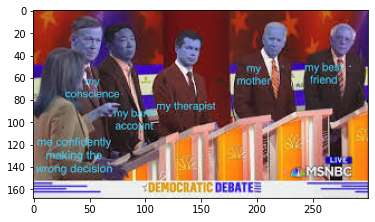

In [5]:
img = cv.imread('/mnt/DATA/fharookshaik/Major Project/dataset/images/memes_1384.png')
plt.imshow(img)